# How to load the natural images used in the Monkey Experiment

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from scipy.misc import face
import torch
import torchvision
import torchvision.transforms as transforms
import gc

In [2]:
img_path = "/data/monkey/toliaslab/CSRF19_V4/images/"
images = [np.load(img_path + i) for i in os.listdir(img_path) if ".npy" in i ]

type(images)

list

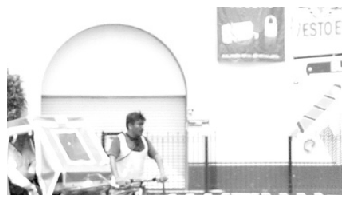

In [3]:
# example image
plt.imshow(images[0], cmap="gray")
plt.axis("off");

In [4]:
image =images[0]

image2 = np.repeat(image[:, :, np.newaxis], 3, axis=2)

print(image.shape)
print(image2.shape)

centerbias = np.zeros(image.shape)


(236, 420)
(236, 420, 3)


In [5]:
from deepgaze_pytorch import load_pytorch_model_from_experiment

In [6]:
gc.collect()
torch.cuda.empty_cache()

deepgaze_2 = load_pytorch_model_from_experiment(
    experiment_directory='/data/image_saliency/experiment0051_DeepGazeII_average_image/',
    training_part='MIT1003',
    crossval_fold=0,
)

Targets are ['conv5_1', 'relu5_1', 'relu5_2', 'conv5_3', 'relu5_4']
Remaining training parameters
saliency_network.layernorm0.weight
saliency_network.layernorm0.bias
saliency_network.conv0.weight
saliency_network.bias0.bias
saliency_network.layernorm1.weight
saliency_network.layernorm1.bias
saliency_network.conv1.weight
saliency_network.bias1.bias
saliency_network.layernorm2.weight
saliency_network.layernorm2.bias
saliency_network.conv2.weight
saliency_network.bias2.bias
fixation_selection_network.layernorm0.layernorm_part0.weight
fixation_selection_network.layernorm0.layernorm_part0.bias
fixation_selection_network.conv0.conv_part0.weight
fixation_selection_network.bias0.bias
fixation_selection_network.layernorm1.weight
fixation_selection_network.layernorm1.bias
fixation_selection_network.conv1.weight
fixation_selection_network.bias1.bias
fixation_selection_network.conv2.weight
finalizer.center_bias_weight
finalizer.gauss.sigma
Using device cuda


In [7]:
gc.collect()
torch.cuda.empty_cache()

log_density = deepgaze_2.forward(
    x=torch.tensor([image2.transpose(2, 0, 1)], dtype=torch.float32).to('cuda'),
    centerbias=torch.tensor([centerbias]).to('cuda')
).detach().cpu().numpy()[0]

print(log_density)

[[-14.43146665 -14.43146665 -14.43146665 ... -11.82749899 -11.82749899
  -11.82749899]
 [-14.43146665 -14.43146665 -14.43146665 ... -11.82749899 -11.82749899
  -11.82749899]
 [-14.43146665 -14.43146665 -14.43146665 ... -11.82749899 -11.82749899
  -11.82749899]
 ...
 [-14.29276319 -14.29276319 -14.29276319 ... -13.40036605 -13.40036605
  -13.40036605]
 [-14.29276319 -14.29276319 -14.29276319 ... -13.40036605 -13.40036605
  -13.40036605]
 [-14.29276319 -14.29276319 -14.29276319 ... -13.40036605 -13.40036605
  -13.40036605]]


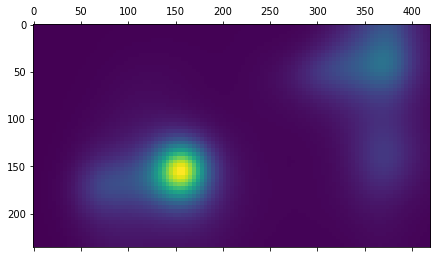

In [8]:
plt.matshow(np.exp(log_density))


In [9]:
img_stack = np.stack(images)

In [10]:
# these are all the 24075 images that we use in our monkey experiments
print(img_stack.shape)
import datetime

(24075, 236, 420)


In [75]:
log_dens_array = []
images2 = []
#for i in img_stack:
for k in range(0, 51):
    i = images[k]
    pil_image = Image.fromarray(i, mode=None)
    #im = cv2.resize(i, dsize=(1067, 600), interpolation=cv2.INTER_CUBIC)
    #im = pil_image.resize((1067, 600))

    im_arr = np.asarray(pil_image)
    centerbias = np.zeros(im_arr.shape)

    image3 = np.repeat(im_arr[:, :, np.newaxis], 3, axis=2)
    images2.append(image3)
    log_dens = deepgaze_2.forward(
        x=torch.tensor([image3.transpose(2, 0, 1)], dtype=torch.float32).to('cuda'),
        centerbias=torch.tensor([centerbias]).to('cuda')).clone().detach().cpu()[0].numpy()
    log_dens_array.append(log_dens)
    print(log_dens.shape)
    b = datetime.datetime.now()
    #print("Process time ", b-a)


51


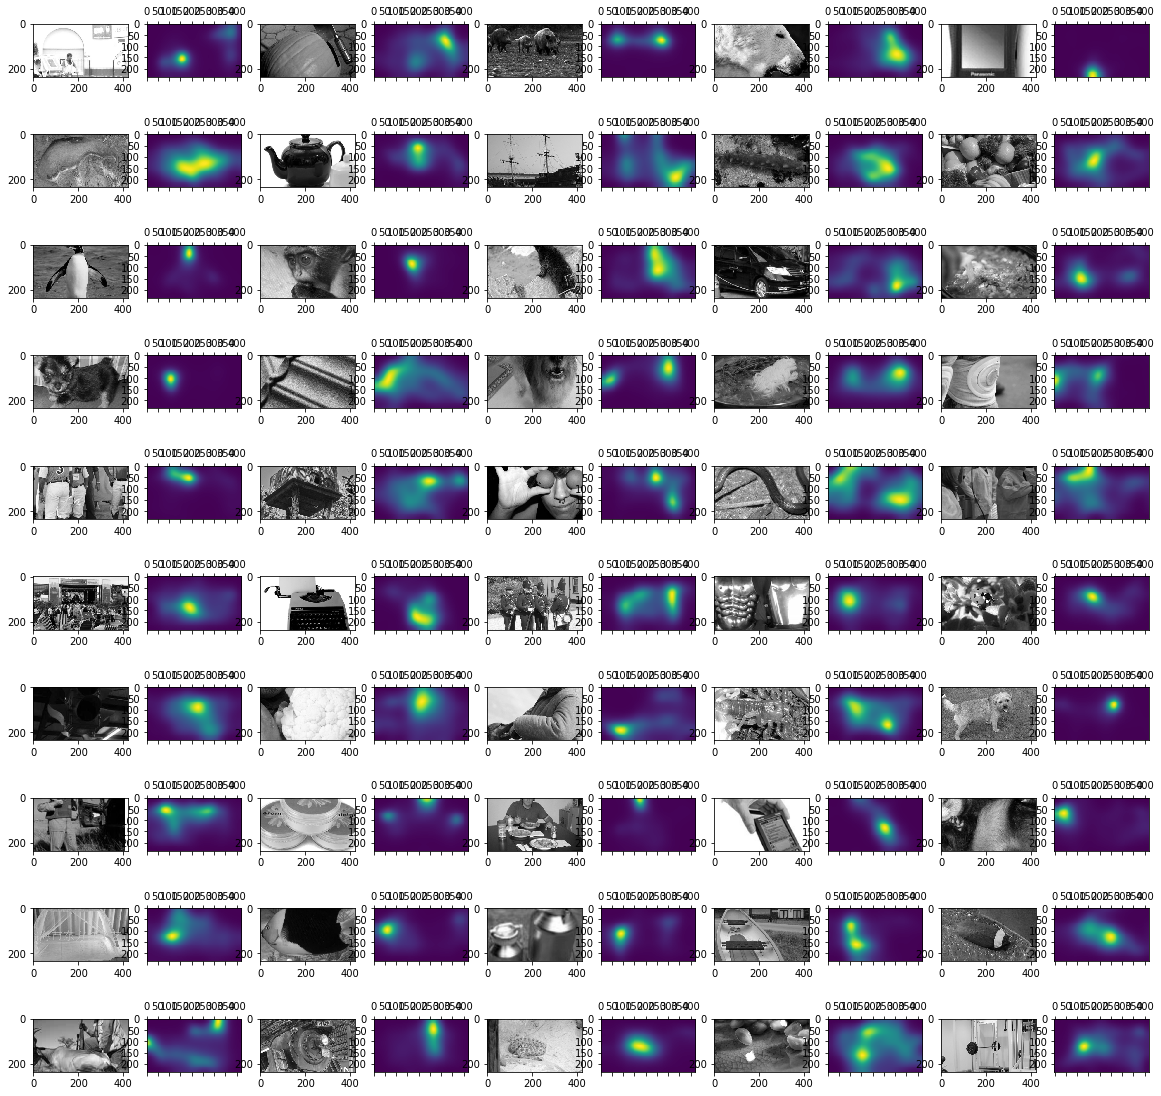

In [76]:
# here, you could add the saliency map next to each picture

fig, axs = plt.subplots(10,10, figsize=(20,20))

j= 0
k = 0
for i in range(0, 10):
    for count in range(0,5):
        axs[i][j].imshow(images[k], cmap="gray")
        j += 1
        axs[i][j].matshow(np.exp(log_dens_array[k]))
        j+= 1
        if (j>8):
            j = 0
        k += 1
    axs.axis("off")
plt.savefig('saliency_maps')

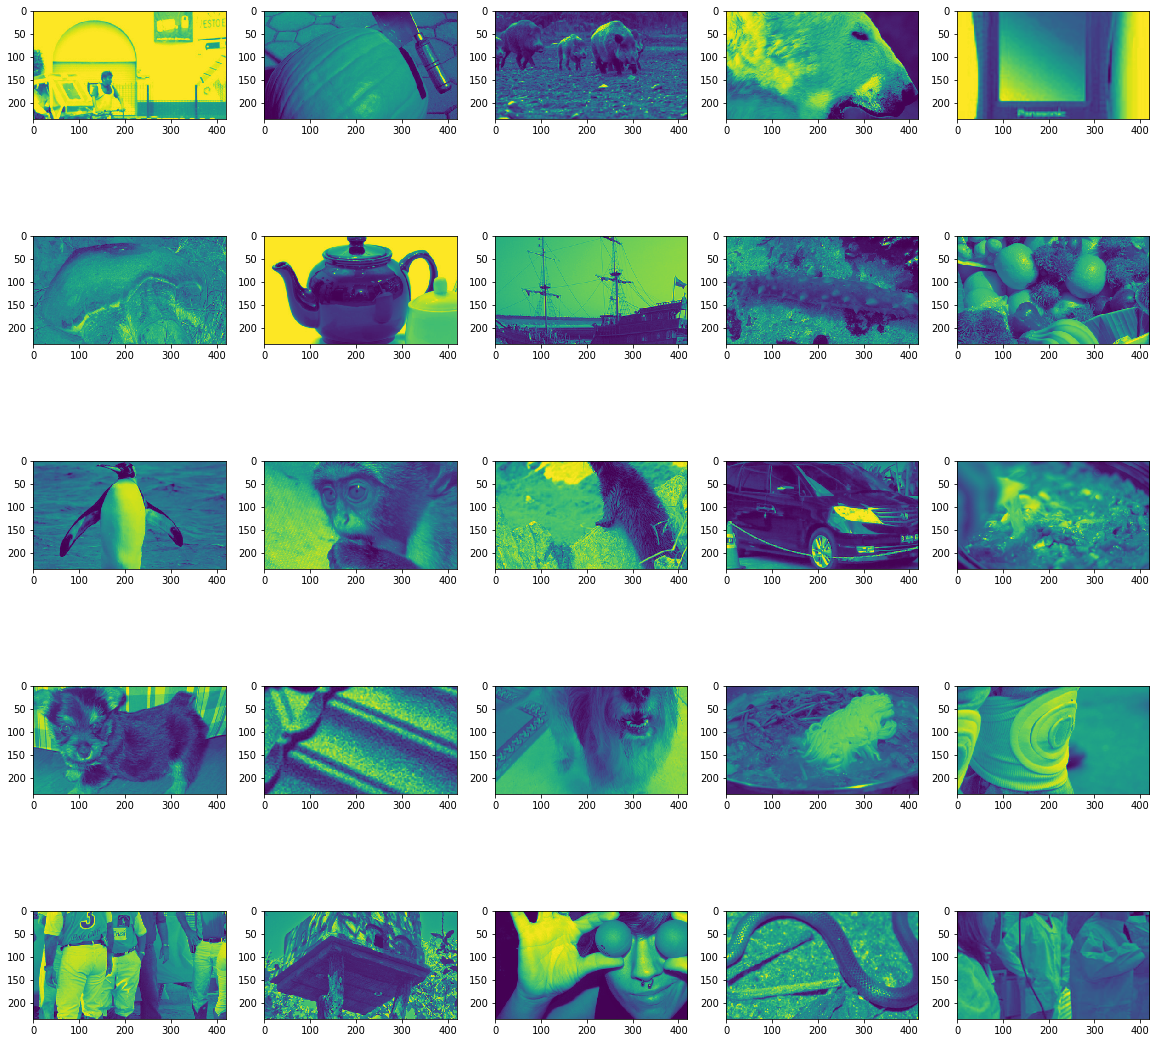

In [88]:
# here, you could add the saliency map next to each picture

fig, axs = plt.subplots(5,5, figsize=(20,20))


img_stack = np.stack(images[0:51])
sal_stack = np.stack(log_dens_array)


both_images = np.concatenate((img_stack, sal_stack), axis=0)
for i, ax in enumerate(axs.ravel()):
    ax.imshow(both_images[i])
    #ax.axis("off")
    #axs.axis("off")